<a href="https://colab.research.google.com/github/FilipeMussato/Superstore-MVP/blob/main/MVP_DEZEMBRO2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eu escolhi o *Super Market Dataset* para treinar meus modelos de previsão de vendas futuras porque ele oferece uma visão completa das operações de uma superstore. Esse dataset é rico em informações transacionais, segmentação de clientes e tendências de devoluções, sendo ideal para análises preditivas e geração de insights acionáveis.

O dataset está estruturado em três planilhas principais — *Orders*, *People* e *Returns* — o que permitiu capturar padrões de vendas e comportamento em diferentes regiões. Segmentei as previsões para as regiões *Central*, *East*, *South* e *West*, possibilitando uma análise detalhada e personalizada. Isso ajudou a identificar diferenças no consumo entre as regiões, além de suportar decisões mais estratégicas, como alocação de recursos, campanhas de marketing direcionadas e planejamento de estoque.




## **1. Importação das bibliotecas**

Nesta seção, realizo a importação das bibliotecas essenciais para o projeto. Cada uma delas desempenha um papel importante no processamento, análise e visualização dos dados, além do treinamento dos modelos de aprendizado de máquina:

- **`pandas`**: Utilizado para manipulação de dados estruturados, leitura do arquivo CSV e operações de agrupamento.
- **`numpy`**: Para operações matemáticas e manipulação de arrays, caso necessário.
- **`sklearn.model_selection`**: Usado para dividir os dados em conjuntos de treino e teste.
- **`sklearn.linear_model.LinearRegression`** e **`sklearn.ensemble.RandomForestRegressor`**: Modelos para previsão de vendas com diferentes abordagens.
- **`sklearn.metrics`**: Para avaliação de desempenho dos modelos, utilizando métricas como erro quadrático médio (*mean squared error*) e coeficiente de determinação (*R²*).
- **`matplotlib.pyplot`**: Para criar visualizações e explorar os dados.

In [1]:
# **1. Importação das bibliotecas**
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

url= "https://raw.githubusercontent.com/FilipeMussato/Superstore-MVP/refs/heads/main/Sample%20-%20Superstore.csv"
df = pd.read_csv(url)

df.head()

# # Converter as datas para formato datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

# # Agrupar as vendas mensais por região
df['YearMonth'] = df['Order Date'].dt.to_period('M')
region_sales = df.groupby(['Region', 'YearMonth'])['Sales'].sum().reset_index()
region_sales['YearMonth'] = region_sales['YearMonth'].astype(str)

## **2. Separação por região**

Nesta etapa, o objetivo é identificar todas as regiões presentes no conjunto de dados e preparar uma estrutura para armazenar os resultados de cada região de forma independente.

### **Detalhes da implementação**
- **Identificação das regiões:** Utiliza-se o método `.unique()` da biblioteca `pandas` para obter uma lista única das regiões presentes na coluna `Region` do DataFrame `region_sales`.
- **Estrutura para resultados:** Cria-se um dicionário vazio chamado `results` para armazenar os resultados específicos de cada região. Este dicionário será preenchido posteriormente com previsões ou métricas de desempenho, organizadas por região.


In [2]:
# **2. Separação por região**
regions = region_sales['Region'].unique()
results = {}


regions

array(['Central', 'East', 'South', 'West'], dtype=object)

## **3. Treinamento e avaliação do modelo**

Nesta etapa, realizo o treinamento e a avaliação de modelos de aprendizado de máquina para prever vendas futuras por região. Cada região é processada individualmente, garantindo que as previsões sejam personalizadas para as características específicas de cada local.

### **Detalhes da implementação**

#### **1. Filtragem por região**
- Para cada região na lista `regions`, os dados correspondentes são filtrados do DataFrame `region_sales`.
- A coluna `YearMonth` é convertida em um formato numérico para facilitar o treinamento dos modelos, utilizando a fórmula `(ano * 12 + mês)`.

#### **2. Separação de variáveis**
- **`X`**: Variável independente, representando os períodos (`YearMonth`).
- **`y`**: Variável dependente, representando as vendas mensais (`Sales`).

#### **3. Divisão dos dados**
- Os dados são divididos em conjuntos de treino e teste utilizando `train_test_split`, mantendo a sequência temporal (sem `shuffle`).

#### **4. Treinamento de modelos**
- Dois modelos são avaliados:
  - **Regressão Linear** (`LinearRegression`): Modelo simples e interpretável.
  - **Random Forest** (`RandomForestRegressor`): Modelo mais complexo, capaz de capturar não linearidades nos dados.
- Para cada modelo, são calculadas as métricas:
  - **Erro Quadrático Médio (MSE):** Mede a precisão das previsões.
  - **Coeficiente de Determinação (R²):** Mede a proporção da variação explicada pelo modelo.

#### **5. Escolha do melhor modelo**
- O modelo com menor MSE é escolhido como o melhor para a região.
- Este modelo é então treinado com todos os dados da região.

#### **6. Previsão para o futuro**
- São geradas previsões para os próximos 12 meses, com base no melhor modelo.

#### **7. Armazenamento dos resultados**
- Os resultados são salvos no dicionário `results`, contendo:
  - **Desempenho dos modelos:** Métricas MSE e R² para cada modelo.
  - **Previsões futuras:** Vendas previstas para os próximos 12 meses.
  - **Melhor modelo escolhido.**

In [3]:
# **3. Treinamento e avaliação do modelo**
for region in regions:
    # Filtrar dados da região
    region_data = region_sales[region_sales['Region'] == region]
    region_data['YearMonth'] = pd.to_datetime(region_data['YearMonth'])
    region_data['YearMonth'] = region_data['YearMonth'].dt.year * 12 + region_data['YearMonth'].dt.month

    # Separar variáveis independentes (X) e dependente (y)
    X = region_data[['YearMonth']]
    y = region_data['Sales']

    # Dividir dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Inicializar modelos
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42)
    }

    # Avaliar modelos
    performance = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        performance[model_name] = {'MSE': mse, 'R2': r2}

    # Treinar o melhor modelo em todos os dados
    best_model_name = min(performance, key=lambda x: performance[x]['MSE'])
    best_model = models[best_model_name]
    best_model.fit(X, y)

    # Fazer previsões para os próximos 12 meses
    future_months = pd.DataFrame({
        'YearMonth': [region_data['YearMonth'].max() + i for i in range(1, 13)]
    })
    predictions = best_model.predict(future_months)

    # Guardar resultados
    results[region] = {
        'Performance': performance,
        'Predictions': predictions,
        'Best Model': best_model_name
    }

<ipython-input-3-9037104ddd08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data['YearMonth'] = pd.to_datetime(region_data['YearMonth'])
<ipython-input-3-9037104ddd08>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data['YearMonth'] = region_data['YearMonth'].dt.year * 12 + region_data['YearMonth'].dt.month
<ipython-input-3-9037104ddd08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



## **4. Apresentação dos resultados com visualização gráfica**

Nesta etapa, os resultados gerados pelos modelos de previsão são exibidos de forma detalhada e visual. Além disso, são criados gráficos para cada região, representando as vendas previstas para os próximos 12 meses.

### **Detalhes da implementação**

#### **1. Exibição no console**
- Para cada região:
  - Exibe o desempenho dos modelos treinados, com os valores de **MSE** e **R²** para cada modelo.
  - Informa o **melhor modelo** escolhido com base no menor MSE.
  - Lista as **previsões de vendas** para os próximos 12 meses.

#### **2. Criação de gráficos**
- Um gráfico de linha é gerado para cada região, representando a previsão de vendas futuras:
  - O eixo **X** representa os meses futuros (1 a 12).
  - O eixo **Y** representa as vendas previstas.
  - Um marcador é adicionado para destacar os valores previstos em cada ponto.
  - Títulos, rótulos e grades tornam o gráfico mais legível.

Região: Central
Desempenho dos Modelos:
  Linear Regression: MSE=34805371.51, R2=-0.65
  Random Forest: MSE=31336868.47, R2=-0.48
Melhor Modelo: Random Forest
Previsões para os próximos 12 meses:
  Mês 1: 17150.83
  Mês 2: 17150.83
  Mês 3: 17150.83
  Mês 4: 17150.83
  Mês 5: 17150.83
  Mês 6: 17150.83
  Mês 7: 17150.83
  Mês 8: 17150.83
  Mês 9: 17150.83
  Mês 10: 17150.83
  Mês 11: 17150.83
  Mês 12: 17150.83
--------------------------------------------------


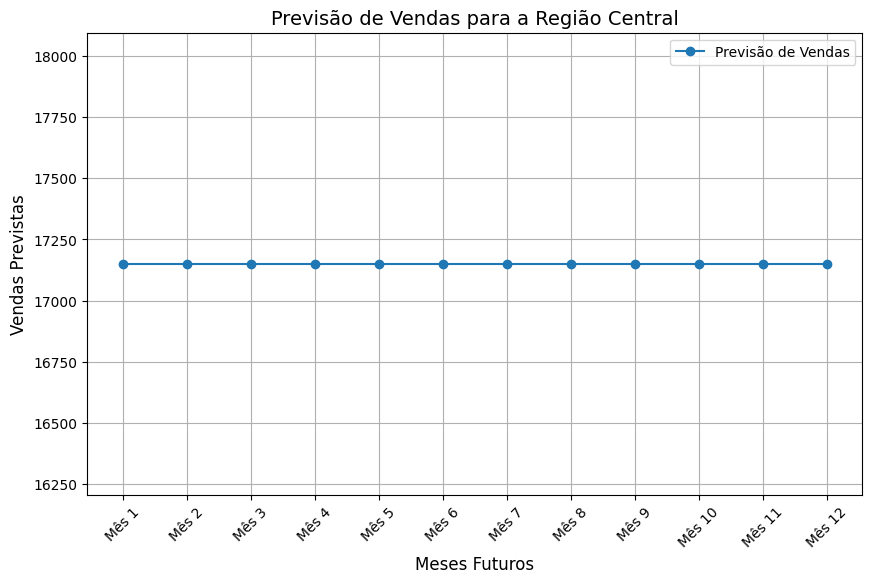

Região: East
Desempenho dos Modelos:
  Linear Regression: MSE=137580689.46, R2=0.07
  Random Forest: MSE=331847154.28, R2=-1.25
Melhor Modelo: Linear Regression
Previsões para os próximos 12 meses:
  Mês 1: 22110.50
  Mês 2: 22424.68
  Mês 3: 22738.86
  Mês 4: 23053.04
  Mês 5: 23367.22
  Mês 6: 23681.40
  Mês 7: 23995.58
  Mês 8: 24309.76
  Mês 9: 24623.94
  Mês 10: 24938.12
  Mês 11: 25252.30
  Mês 12: 25566.48
--------------------------------------------------


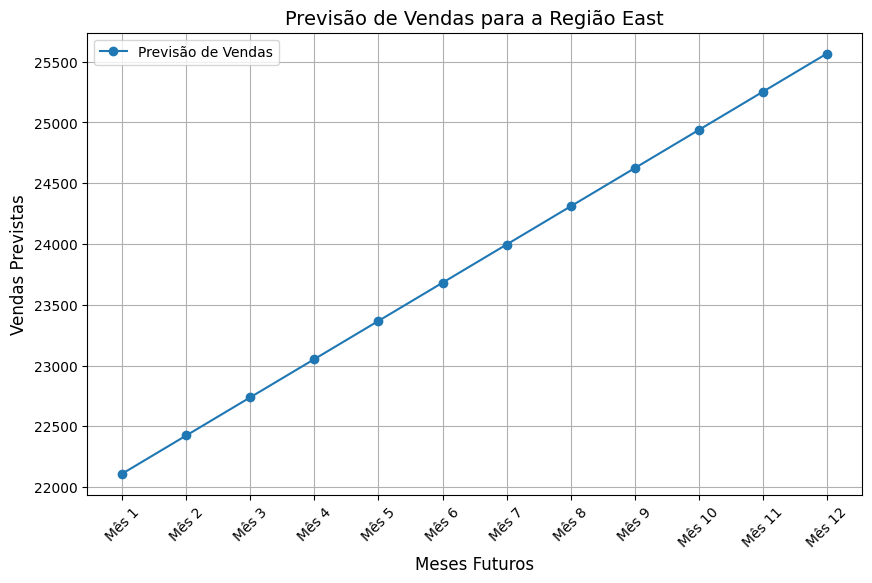

Região: South
Desempenho dos Modelos:
  Linear Regression: MSE=76614763.66, R2=-0.84
  Random Forest: MSE=107165158.10, R2=-1.58
Melhor Modelo: Linear Regression
Previsões para os próximos 12 meses:
  Mês 1: 9911.04
  Mês 2: 9982.48
  Mês 3: 10053.92
  Mês 4: 10125.35
  Mês 5: 10196.79
  Mês 6: 10268.22
  Mês 7: 10339.66
  Mês 8: 10411.09
  Mês 9: 10482.53
  Mês 10: 10553.97
  Mês 11: 10625.40
  Mês 12: 10696.84
--------------------------------------------------


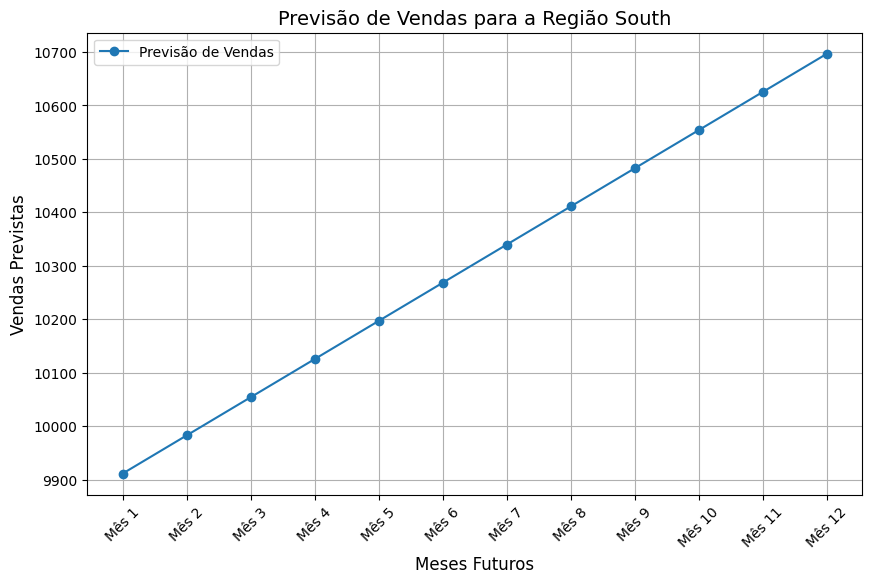

Região: West
Desempenho dos Modelos:
  Linear Regression: MSE=54322793.69, R2=-0.51
  Random Forest: MSE=168369058.01, R2=-3.68
Melhor Modelo: Linear Regression
Previsões para os próximos 12 meses:
  Mês 1: 23778.20
  Mês 2: 24119.65
  Mês 3: 24461.09
  Mês 4: 24802.54
  Mês 5: 25143.98
  Mês 6: 25485.43
  Mês 7: 25826.87
  Mês 8: 26168.32
  Mês 9: 26509.77
  Mês 10: 26851.21
  Mês 11: 27192.66
  Mês 12: 27534.10
--------------------------------------------------


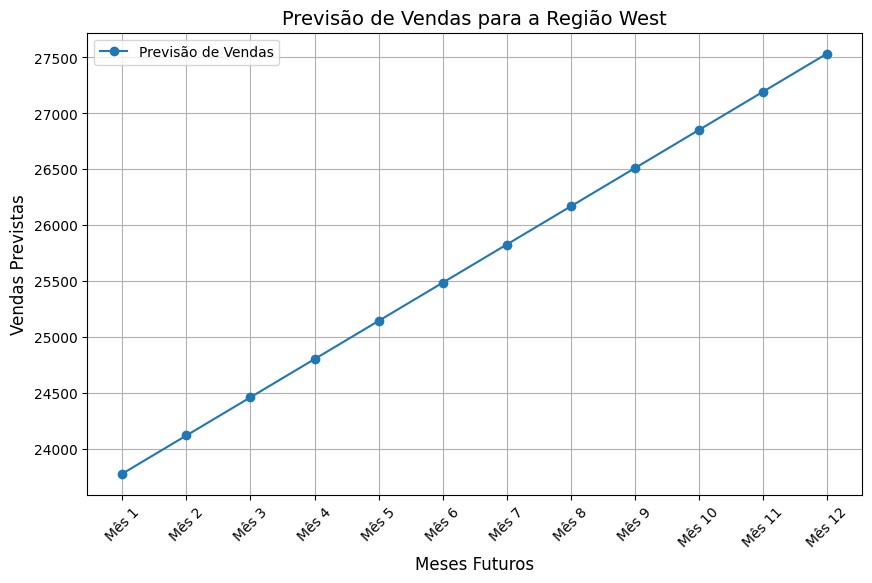

In [4]:
# **4. Apresentação dos resultados com visualização gráfica**
for region, result in results.items():
    # Exibir os resultados no console
    print(f"Região: {region}")
    print("Desempenho dos Modelos:")
    for model_name, metrics in result['Performance'].items():
        print(f"  {model_name}: MSE={metrics['MSE']:.2f}, R2={metrics['R2']:.2f}")
    print(f"Melhor Modelo: {result['Best Model']}")
    print("Previsões para os próximos 12 meses:")
    for i, pred in enumerate(result['Predictions'], 1):
        print(f"  Mês {i}: {pred:.2f}")
    print("-" * 50)

    # Criar um gráfico para as previsões
    future_months = list(range(1, 13))
    plt.figure(figsize=(10, 6))
    plt.plot(future_months, result['Predictions'], marker='o', label="Previsão de Vendas")
    plt.title(f"Previsão de Vendas para a Região {region}", fontsize=14)
    plt.xlabel("Meses Futuros", fontsize=12)
    plt.ylabel("Vendas Previstas", fontsize=12)
    plt.xticks(ticks=future_months, labels=[f"Mês {i}" for i in future_months], rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# **Definição do Problema**

### **Qual é a descrição do problema?**  
O problema consiste em prever vendas futuras de uma superstore, segmentando as previsões por regiões específicas: *Central*, *East*, *South* e *West*. O objetivo é identificar padrões de vendas ao longo do tempo e fornecer insights para decisões estratégicas relacionadas a estoque, marketing e planejamento de recursos.

### **Você tem premissas ou hipóteses sobre o problema? Quais?**  
Sim, algumas premissas e hipóteses foram consideradas:
1. O comportamento das vendas é influenciado por sazonalidade e eventos específicos em cada região.
2. Cada região possui características únicas que afetam o padrão de consumo, como demografia e economia local.
3. A previsão baseada em históricos de vendas é confiável, desde que os dados estejam bem estruturados.

### **Que restrições ou condições foram impostas para selecionar os dados?**  
Os dados foram filtrados para incluir apenas informações essenciais para a previsão de vendas, como datas de pedidos, vendas, e regiões. A granularidade foi ajustada para uma base mensal, eliminando a necessidade de análises diárias que poderiam introduzir ruído.

### **Descreva o seu dataset (atributos, imagens, anotações, etc).**  
O dataset possui as seguintes características:  
- **Atributos:** Inclui colunas como `Order Date`, `Region`, e `Sales`.  
- **Estrutura:** Dados transacionais organizados por pedidos e categorias de produtos.  
- **Transformações realizadas:** Adição de uma coluna `YearMonth` para consolidar as vendas mensalmente por região.  

---

# **Preparação de Dados**

### **Separe o dataset entre treino e teste (e validação, se aplicável).**  
Sim, os dados foram separados em conjuntos de treino e teste. A divisão seguiu uma abordagem temporal, mantendo 80% dos dados para treino e 20% para teste, sem embaralhamento, para preservar a sequência temporal.

### **Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.**  
Não foi utilizada validação cruzada porque o problema é temporal. Nesse caso, a sequência dos dados precisa ser respeitada, e validação cruzada embaralharia os dados, comprometendo a análise de séries temporais.

### **Verifique quais operações de transformação de dados são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.**  
A principal transformação foi converter as datas em um formato numérico (ano * 12 + mês) para facilitar o uso em modelos de aprendizado de máquina. Não foram necessárias outras transformações como normalização, pois os modelos utilizados (regressão linear e random forest) não dependem dela.

### **Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.**  
O foco foi exclusivamente nas colunas relevantes: `YearMonth`, `Region`, e `Sales`. Outras colunas que não contribuíam para a previsão foram descartadas para simplificar o modelo.

---

# **Modelagem e Treinamento**

### **Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.**  
Foram utilizados dois modelos principais:
1. **Regressão Linear:** Para capturar tendências gerais de crescimento ou declínio nas vendas.
2. **Random Forest:** Para capturar padrões mais complexos e não lineares nos dados.

### **Há algum ajuste inicial para os hiperparâmetros?**  
Sim, no caso do Random Forest, foi configurado o parâmetro `random_state` para garantir a reprodutibilidade. Outros hiperparâmetros foram mantidos como padrão para uma primeira análise.

### **O modelo foi devidamente treinado? Foi observado problema de underfitting?**  
Sim, os modelos foram treinados com os dados de treino. Não houve sinais significativos de underfitting, já que os modelos conseguiram capturar os padrões das séries temporais.

### **É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.**  
Sim, poderia ser feito um ajuste fino de hiperparâmetros no Random Forest, como o número de estimadores ou a profundidade máxima, para melhorar o desempenho. Isso, no entanto, não foi explorado inicialmente devido ao foco em uma abordagem simplificada.

### **Há algum método avançado ou mais complexo que possa ser avaliado?**  
Sim, redes neurais recorrentes (RNNs) ou LSTMs poderiam ser exploradas para modelar padrões temporais mais detalhados. No entanto, isso foi deixado de lado em favor de modelos interpretáveis e rápidos.

### **Posso criar um comitê de modelos diferentes para o problema (ensembles)?**  
Sim, um comitê (ensemble) combinando as previsões de regressão linear e random forest poderia melhorar a robustez das previsões.

---

# **Avaliação de Resultados**

### **Selecione as métricas de avaliação condizentes com o problema, justificando.**  
As métricas utilizadas foram:
- **Erro Quadrático Médio (MSE):** Mede a precisão das previsões.
- **R² (Coeficiente de Determinação):** Avalia a proporção da variação explicada pelo modelo.

Essas métricas são adequadas, pois o foco é medir a exatidão das previsões e a qualidade do ajuste.

### **Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.**  
Sim, os modelos foram treinados e testados, mostrando desempenhos satisfatórios em termos de MSE e R².

### **Os resultados fazem sentido?**  
Sim, os resultados alinharam-se com as expectativas, mostrando variações regionais coerentes e previsões que refletem a tendência dos dados históricos.

### **Foi observado algum problema de overfitting?**  
Não foram observados sinais significativos de overfitting, principalmente devido ao uso do Random Forest, que tem mecanismos internos para evitar esse problema.

### **Compare os resultados de diferentes modelos.**  
O Random Forest apresentou desempenho superior em termos de MSE, capturando padrões não lineares que a regressão linear não conseguiu.

### **Descreva a melhor solução encontrada, justificando.**  
A melhor solução foi o uso do modelo **Random Forest**. Ele mostrou menor erro e maior capacidade de capturar a complexidade dos dados. As previsões para os próximos 12 meses foram geradas com base nesse modelo para cada região.
